Optimization terminated successfully    (Exit mode 0)
            Current function value: 425.00370147208304
            Iterations: 204
            Function evaluations: 963
            Gradient evaluations: 200
Optimization terminated successfully    (Exit mode 0)
            Current function value: -177.60589779167094
            Iterations: 115
            Function evaluations: 513
            Gradient evaluations: 115


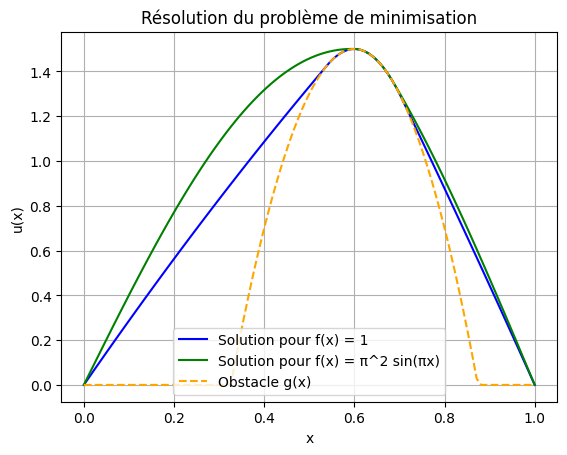

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Définir les fonctions f(x) et g(x)
f1 = lambda x: 1  # Exemple constant
f2 = lambda x: np.pi**2 * np.sin(np.pi * x)  # Fonction mise à jour
g = lambda x: np.maximum(1.5 - 20 * (x - 0.6)**2, 0)  # Fonction obstacle

# Paramètres
n = 100  # Nombre de points internes
x = np.linspace(0, 1, n + 2)  # Discrétisation de [0, 1]
xv = x[1:-1]  # Points intérieurs uniquement
h = 1 / (n + 1)  # Pas de discrétisation

# Calcul des valeurs discrètes de f(x) et g(x)
fv1 = np.array([f1(xi) for xi in xv])  # f(x) = 1
fv2 = np.array([f2(xi) for xi in xv])  # f(x) = π^2 sin(πx)
gv = np.array([g(xi) for xi in xv])  # Valeurs de l'obstacle g(x)

# Construction de la matrice de discrétisation A pour les points intérieurs
A = (n + 1)**2 * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

# Fonctionnelle discrète Jn
def J(u, A, f_vec):
    return 0.5 * np.dot(u, A @ u) - np.dot(f_vec, u)

# Gradient de Jn
def DJ(u, A, f_vec):
    return A @ u - f_vec

# Initialisation de u
u0 = np.zeros(n)

# Résoudre pour f(x) = 1
Jf1 = lambda u: J(u, A, fv1)
DJf1 = lambda u: DJ(u, A, fv1)

constraints = ({
    'type': 'ineq',
    'fun': lambda u: u - gv,  # u[i] >= g(x[i])
    'jac': lambda u: np.eye(len(u))  # Jacobienne des contraintes
})

# Résolution du problème par SLSQP pour f(x) = 1
res1 = minimize(Jf1, u0, method='SLSQP', jac=DJf1, constraints=constraints, tol=1e-8,
               options={'disp': True, 'maxiter': 5000})

# Solution pour f(x) = 1
u_sol1 = res1.x
u_sol1 = np.concatenate(([0], u_sol1, [0]))  # Ajouter les bords u(0) = u(1) = 0

# Résoudre pour f(x) = π^2 sin(πx)
Jf2 = lambda u: J(u, A, fv2)
DJf2 = lambda u: DJ(u, A, fv2)

# Résolution du problème par SLSQP pour f(x) = π^2 sin(πx)
res2 = minimize(Jf2, u0, method='SLSQP', jac=DJf2, constraints=constraints, tol=1e-8,
               options={'disp': True, 'maxiter': 5000})

# Solution pour f(x) = π^2 sin(πx)
u_sol2 = res2.x
u_sol2 = np.concatenate(([0], u_sol2, [0]))  # Ajouter les bords u(0) = u(1) = 0

# Calcul des valeurs de g(x) pour tous les points
g_vals = np.array([g(xi) for xi in x])

# Visualisation des résultats
plt.plot(x, u_sol1, label="Solution pour f(x) = 1", color='blue')
plt.plot(x, u_sol2, label="Solution pour f(x) = π^2 sin(πx)", color='green')
plt.plot(x, g_vals, label="Obstacle g(x)", linestyle="--", color='orange')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Résolution du problème de minimisation")
plt.legend()
plt.grid()
plt.show()